In [1]:
import torch
import norse
import matplotlib.pyplot as plt

In [2]:
from norse.torch.module import LIFRecurrentCell

m = LIFRecurrentCell(input_size=200, hidden_size=100)
m

LIFRecurrentCell(input_size=200, hidden_size=100, p=LIFParameters(tau_syn_inv=tensor(200.), tau_mem_inv=tensor(100.), v_leak=tensor(0.), v_th=tensor(1.), v_reset=tensor(0.), method='super', alpha=tensor(100.)), autapses=False, dt=0.001)

Text(0.5, 0, '$\\tau_{m}^{-1}$ [ms]')

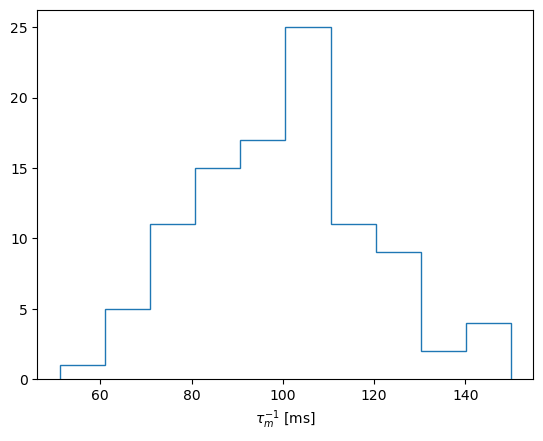

In [3]:
import numpy as np

counts, bins = np.histogram(norse.torch.functional.lif.LIFParameters().tau_mem_inv + 20*torch.randn(100))
plt.hist(bins[:-1], bins, weights=counts, histtype='step')
plt.xlabel('$\\tau_{m}^{-1}$ [ms]')

In [4]:
list(m.parameters())

[Parameter containing:
 tensor([[ 0.2676, -0.0522, -0.1535,  ..., -0.0796,  0.0449, -0.1860],
         [-0.1382, -0.0764,  0.2094,  ..., -0.1871,  0.1839,  0.0287],
         [ 0.0176, -0.0103, -0.0950,  ...,  0.1223,  0.0826,  0.0538],
         ...,
         [ 0.1224, -0.0560, -0.0899,  ..., -0.1222,  0.0271, -0.0551],
         [-0.1358,  0.2065, -0.1202,  ..., -0.1130, -0.0658,  0.0647],
         [ 0.0817, -0.1595, -0.0158,  ..., -0.1951,  0.0296, -0.0725]],
        requires_grad=True),
 Parameter containing:
 tensor([[ 0.0000, -0.3308,  0.2812,  ...,  0.0482,  0.1021, -0.0473],
         [ 0.2430,  0.0000, -0.1967,  ..., -0.1084, -0.0535,  0.1419],
         [-0.0912, -0.1800,  0.0000,  ..., -0.0947,  0.1667, -0.0870],
         ...,
         [-0.2257, -0.0088, -0.0096,  ...,  0.0000,  0.0473,  0.2280],
         [ 0.1572, -0.1428,  0.0221,  ...,  0.2339,  0.0000,  0.0244],
         [ 0.1511,  0.2873, -0.1049,  ...,  0.1005, -0.0197,  0.0000]],
        requires_grad=True)]

In [5]:
class ParametrizedLIFRecurrentCell(torch.nn.Module):
    def __init__(self, input_size, hidden_size):
        super(ParametrizedLIFRecurrentCell, self).__init__()
        self.tau_mem_inv = torch.nn.Parameter(norse.torch.functional.lif.LIFParameters().tau_mem_inv + 20*torch.randn(hidden_size))
        self.v_th = torch.nn.Parameter(0.5 + 0.1 * torch.randn(hidden_size))
        self.cell = norse.torch.module.LIFRecurrentCell(input_size=input_size, hidden_size=hidden_size, 
                                                        p = norse.torch.functional.lif.LIFParameters(
                                                            tau_mem_inv = self.tau_mem_inv,
                                                            v_th = self.v_th,
                                                            alpha = 100,
                                                        )
                                                        
        )

    def forward(self, x, s = None):
        return self.cell(x, s)

In [6]:
m = ParametrizedLIFRecurrentCell(200, 100)
m

ParametrizedLIFRecurrentCell(
  (cell): LIFRecurrentCell(
    input_size=200, hidden_size=100, p=LIFParameters(tau_syn_inv=tensor(200.), tau_mem_inv=Parameter containing:
    tensor([104.7281, 101.6396,  84.8718,  83.2864,  69.8226, 117.4626,  85.0936,
            116.4657,  97.2168, 111.4760,  46.5451,  91.2979, 112.2793, 119.0442,
            112.2964, 100.9243, 110.3354, 106.6789,  89.2081,  81.2224,  71.0582,
            118.2742,  91.8783, 121.2497, 112.2054,  80.3273,  74.1310,  68.0041,
            101.4786, 100.4249,  91.0892,  74.2219,  71.8813, 131.9022,  92.1211,
             90.6513, 102.2527,  86.0426, 113.5470,  81.2334, 126.0289,  94.8032,
             74.3985,  81.9489, 112.5691,  83.5453,  81.7073, 143.4576, 123.0047,
             80.6595, 119.3603, 122.0634, 102.5019, 113.9776, 113.9275, 101.8154,
            110.5143,  93.5697,  46.9966, 107.6363,  57.9739, 102.0289,  84.0718,
            114.5609, 123.8620, 119.5837, 117.7111,  99.6729, 116.9006, 114.9702,
         

In [7]:
list(m.parameters())

[Parameter containing:
 tensor([104.7281, 101.6396,  84.8718,  83.2864,  69.8226, 117.4626,  85.0936,
         116.4657,  97.2168, 111.4760,  46.5451,  91.2979, 112.2793, 119.0442,
         112.2964, 100.9243, 110.3354, 106.6789,  89.2081,  81.2224,  71.0582,
         118.2742,  91.8783, 121.2497, 112.2054,  80.3273,  74.1310,  68.0041,
         101.4786, 100.4249,  91.0892,  74.2219,  71.8813, 131.9022,  92.1211,
          90.6513, 102.2527,  86.0426, 113.5470,  81.2334, 126.0289,  94.8032,
          74.3985,  81.9489, 112.5691,  83.5453,  81.7073, 143.4576, 123.0047,
          80.6595, 119.3603, 122.0634, 102.5019, 113.9776, 113.9275, 101.8154,
         110.5143,  93.5697,  46.9966, 107.6363,  57.9739, 102.0289,  84.0718,
         114.5609, 123.8620, 119.5837, 117.7111,  99.6729, 116.9006, 114.9702,
         118.6003, 122.7181, 113.2955, 117.9572,  97.3156,  87.0879, 102.6742,
         113.3445,  93.7374, 128.8436, 112.2898,  61.8087, 100.4912,  84.5942,
         113.4120, 108.8689, 

In [8]:
import torchvision

BATCH_SIZE = 256

transform = torchvision.transforms.Compose(
    [
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize((0.1307,), (0.3081,)),
    ]
)

train_data = torchvision.datasets.MNIST(
    root=".",
    train=True,
    download=True,
    transform=transform,
)

train_loader = torch.utils.data.DataLoader(
    train_data,
    batch_size=BATCH_SIZE,
    shuffle=True
)

test_loader = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST(
        root=".",
        train=False,
        transform=transform,
    ),
    batch_size=BATCH_SIZE
)

100%|██████████████████████████████████████████████████████████████████| 9912422/9912422 [00:02<00:00, 4712023.10it/s]


Extracting .\MNIST\raw\train-images-idx3-ubyte.gz to .\MNIST\raw



100%|█████████████████████████████████████████████████████████████████████| 28881/28881 [00:00<00:00, 28855572.61it/s]


Extracting .\MNIST\raw\train-labels-idx1-ubyte.gz to .\MNIST\raw



100%|██████████████████████████████████████████████████████████████████| 1648877/1648877 [00:00<00:00, 4369861.51it/s]


Extracting .\MNIST\raw\t10k-images-idx3-ubyte.gz to .\MNIST\raw



100%|█████████████████████████████████████████████████████████████████████████████████████| 4542/4542 [00:00<?, ?it/s]

Extracting .\MNIST\raw\t10k-labels-idx1-ubyte.gz to .\MNIST\raw



In [9]:
from norse.torch import LICell

class SNN(torch.nn.Module):
    def __init__(self, 
                 input_features,
                 hidden_features, 
                 output_features,
                 recurrent_cell
                ):
        super(SNN, self).__init__()
        self.cell = recurrent_cell
        self.fc_out = torch.nn.Linear(hidden_features, output_features, bias=False)
        self.out = LICell()
        self.input_features = input_features
                             
    def forward(self, x):
        seq_length, batch_size, _, _, _ = x.shape
        s1 = so = None
        voltages = []


        for ts in range(seq_length):
            z = x[ts, :, :, :].view(-1, self.input_features)
            z, s1 = self.cell(z, s1)
            z = self.fc_out(z)
            vo, so = self.out(z, so)
            voltages += [vo]
        
        return torch.stack(voltages)

In [10]:
class Model(torch.nn.Module):
    def __init__(self, encoder, snn, decoder):
        super(Model, self).__init__()
        self.encoder = encoder
        self.snn = snn
        self.decoder = decoder

    def forward(self, x):
        x = self.encoder(x)
        x = self.snn(x)
        log_p_y = self.decoder(x)
        return log_p_y

In [11]:
from tqdm.notebook import tqdm, trange

def train(model, device, train_loader, optimizer, epoch, max_epochs):
    model.train()
    losses = []

    for (data, target) in tqdm(train_loader, leave=False):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = torch.nn.functional.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())

    mean_loss = np.mean(losses)
    return losses, mean_loss

In [12]:
def test(model, device, test_loader, epoch):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += torch.nn.functional.nll_loss(
                output, target, reduction="sum"
            ).item()  # sum up batch loss
            pred = output.argmax(
                dim=1, keepdim=True
            )  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    accuracy = 100.0 * correct / len(test_loader.dataset)

    return test_loss, accuracy

In [13]:
from norse.torch import ConstantCurrentLIFEncoder

def decode(x):
    x, _ = torch.max(x, 0)
    log_p_y = torch.nn.functional.log_softmax(x, dim=1)
    return log_p_y


T = 32
LR = 0.002
INPUT_FEATURES = 28*28
HIDDEN_FEATURES = 100
OUTPUT_FEATURES = 10
EPOCHS = 5

if torch.cuda.is_available():
    DEVICE = torch.device("cuda")
else:
    DEVICE = torch.device("cpu")

In [14]:
def run_training(model, optimizer, epochs = EPOCHS):
    training_losses = []
    mean_losses = []
    test_losses = []
    accuracies = []

    torch.autograd.set_detect_anomaly(True)

    for epoch in trange(epochs):
        training_loss, mean_loss = train(model, DEVICE, train_loader, optimizer, epoch, max_epochs=EPOCHS)
        test_loss, accuracy = test(model, DEVICE, test_loader, epoch)
        training_losses += training_loss
        mean_losses.append(mean_loss)
        test_losses.append(test_loss)
        accuracies.append(accuracy)

    print(f"final accuracy: {accuracies[-1]}")
    return model

In [15]:
model = Model(
    encoder=ConstantCurrentLIFEncoder(
      seq_length=T,
    ),
    snn=SNN(
      input_features=INPUT_FEATURES,
      hidden_features=HIDDEN_FEATURES,
      output_features=OUTPUT_FEATURES,
      recurrent_cell=ParametrizedLIFRecurrentCell(
            input_size=28*28, 
            hidden_size=100
      )
    ),
    decoder=decode
).to(DEVICE)

optimizer = torch.optim.Adam(model.parameters(), lr=LR)

In [16]:
tau_mem_inv_before = model.snn.cell.cell.p.tau_mem_inv.cpu().detach().numpy()
v_th_before = model.snn.cell.cell.p.v_th.cpu().detach().numpy()

In [17]:
model_after = run_training(model, optimizer, epochs=2)

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/235 [00:00<?, ?it/s]

  0%|          | 0/235 [00:00<?, ?it/s]

final accuracy: 94.32


In [18]:
tau_mem_inv_after = model_after.snn.cell.cell.p.tau_mem_inv.cpu().detach().numpy()
v_th_after = model_after.snn.cell.cell.p.v_th.cpu().detach().numpy()

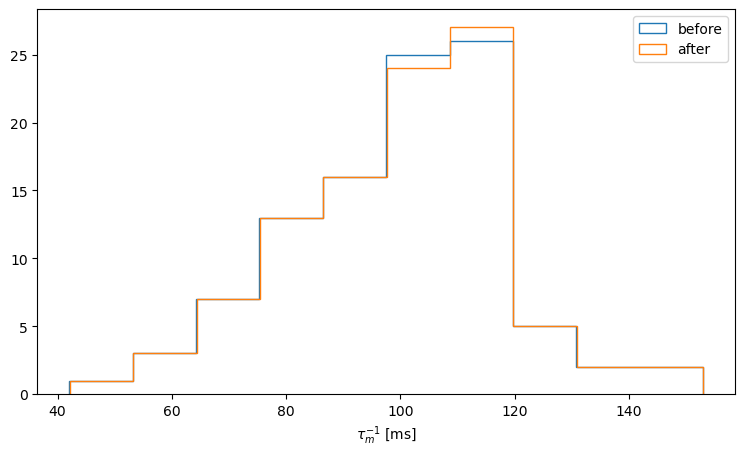

In [19]:
counts, bins = np.histogram(tau_mem_inv_before)
fig, ax = plt.subplots(figsize=(9,5))
ax.hist(bins[:-1], bins, weights=counts, histtype='step', label='before')
counts, bins = np.histogram(tau_mem_inv_after)
ax.hist(bins[:-1], bins, weights=counts, histtype='step', label='after')
ax.set_xlabel('$\\tau_{m}^{-1}$ [ms]')
ax.legend()

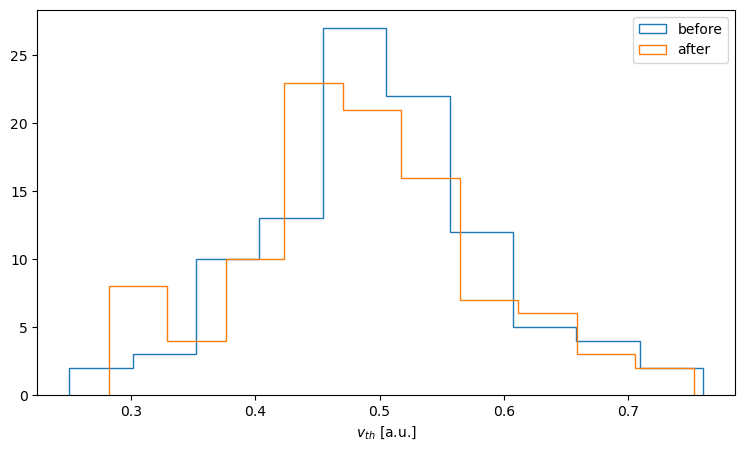

In [20]:
counts, bins = np.histogram(v_th_before)
fig, ax = plt.subplots(figsize=(9,5))
ax.hist(bins[:-1], bins, weights=counts, histtype='step', label='before')
counts, bins = np.histogram(v_th_after)
ax.hist(bins[:-1], bins, weights=counts, histtype='step', label='after')
ax.set_xlabel('$v_{th}$ [a.u.]')
ax.legend()